Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Lodaing The Dataset

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
df = pd.read_csv('flow.csv', names=columns, skiprows=1)

In [3]:
print(df.head())


   Sepal length  Sepal width  Petal length  Petal width Class_labels
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [31]:
df.describe

<bound method NDFrame.describe of      Sepal length  Sepal width  Petal length  Petal width    Class_labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

Visualize the distribution of target classes


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Class_labels', data=df)
plt.title('Distribution of Target Classes')

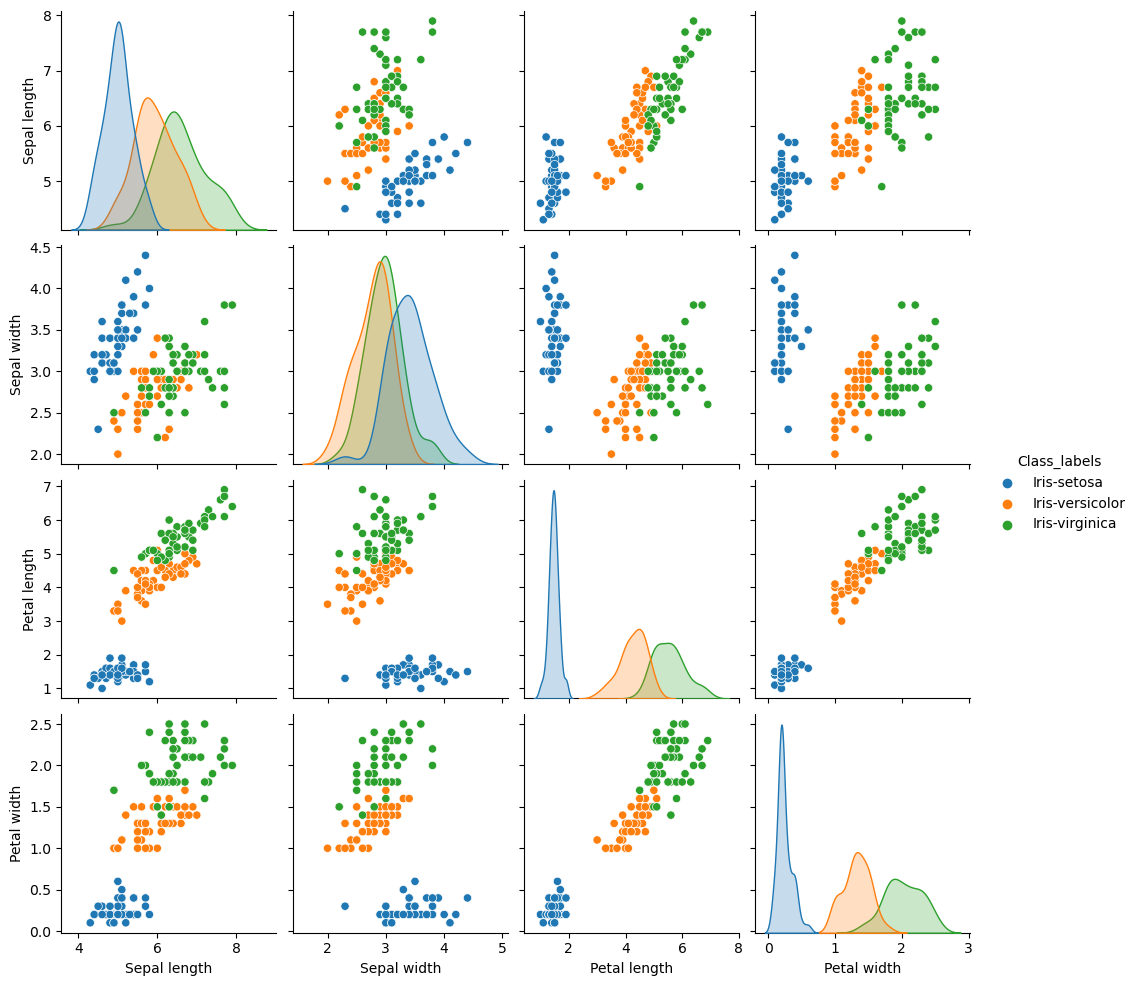

In [32]:
sns.pairplot(df, hue='Class_labels')
plt.show()

Visualize the distribution of features


Text(0.5, 1.0, 'Distribution of Sepal Length by Class Labels')

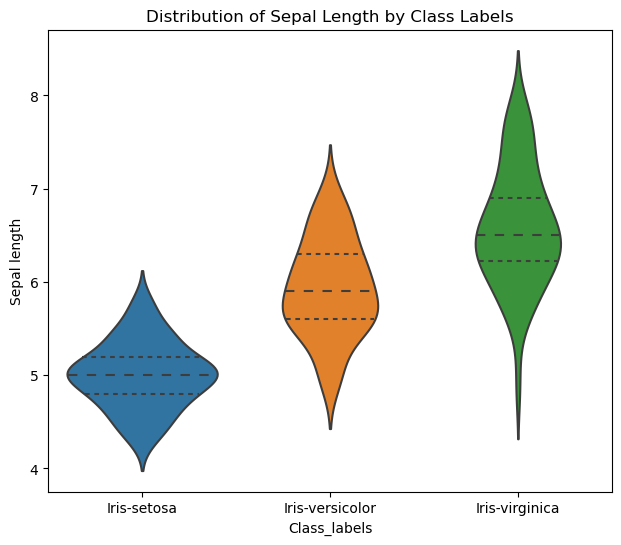

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Class_labels', data=df)
plt.title('Distribution of Target Classes')

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

 Separate features and target


In [14]:
data = df.values
X = data[:, 0:4]
Y = data[:, 4]

Split the data into training and testing sets


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


 Visualize the distribution of target classes in the training set


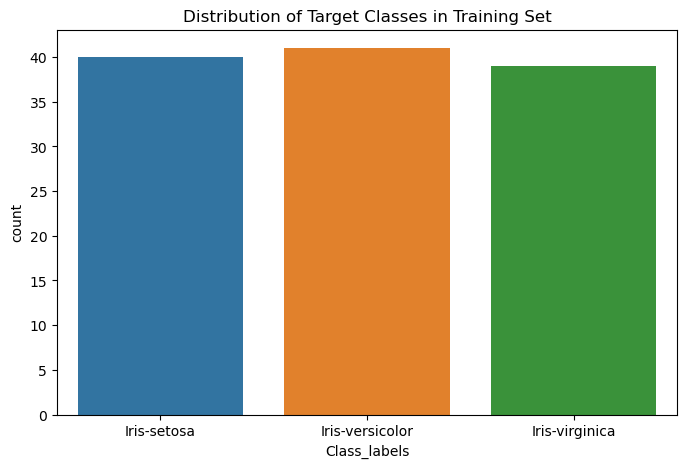

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class_labels', data=pd.DataFrame({'Class_labels': y_train}))
plt.title('Distribution of Target Classes in Training Set')
plt.show()

 Logistic Regression


In [18]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
prediction = model_LR.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


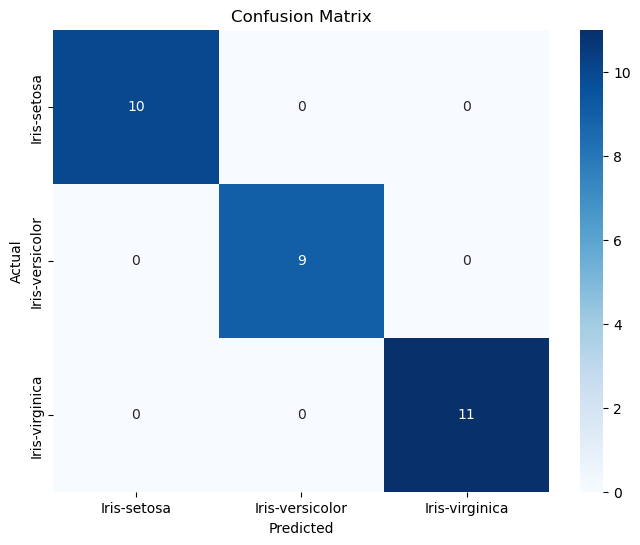

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d', cmap='Blues', xticklabels=df['Class_labels'].unique(), yticklabels=df['Class_labels'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

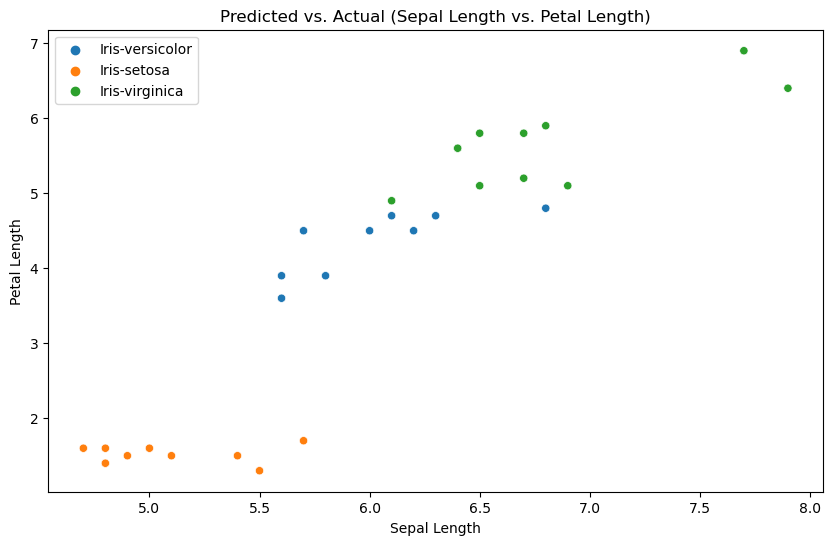

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 2], hue=prediction)
plt.title('Predicted vs. Actual (Sepal Length vs. Petal Length)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()